# Sentinel-2 dataset processing

In [1]:
import os

import numpy as np
import tifffile as tiff
import h5py

In [2]:
# Specify the path to the image and mask files
IMG_FILE = "../.data/2018.04/rgb_nir/rgb_nir.tif"
MASK_FILE = "../.data/label.tif"

BLOCK_DIR = "../.data/2018.04/blocks"
MASK_DIR = "../.data/2018.04/masks"

# if BLOCK_DIR and MASK_DIR do not exist, create them
if not os.path.exists(BLOCK_DIR):
    os.makedirs(BLOCK_DIR)
if not os.path.exists(MASK_DIR):
    os.makedirs(MASK_DIR)

In [3]:
## Create blocks from the image and mask files

# Load the image and mask files
img = tiff.imread(IMG_FILE)
mask = tiff.imread(MASK_FILE)

block_size = 1024
overlap = 0.25 * block_size


n_blocks_x = int(np.ceil(img.shape[1] / overlap)) 
n_blocks_y = int(np.ceil(img.shape[0] / overlap))

In [4]:
img.shape

(20982, 20982, 4)

In [7]:
# Iterate over the image rows and columns, slicing the image into chunks with overlap
counter = 0

for i in range(n_blocks_y):
    for j in range(n_blocks_x):
        x1 = int(j*overlap)  
        x2 = int(min(x1 + block_size, img.shape[1]))
        y1 = int(i*overlap)
        y2 = int(min(y1 + block_size, img.shape[0]))
        
        block = img[y1:y2, x1:x2, :]
        mask_block = mask[y1:y2, x1:x2]
        if block.shape[0] >= block_size and block.shape[1] >= block_size:
            tiff.imwrite(os.path.join(BLOCK_DIR, f"{counter}.tif"), block)
            tiff.imwrite(os.path.join(MASK_DIR, f"{counter}.tif"), mask_block)
            counter += 1


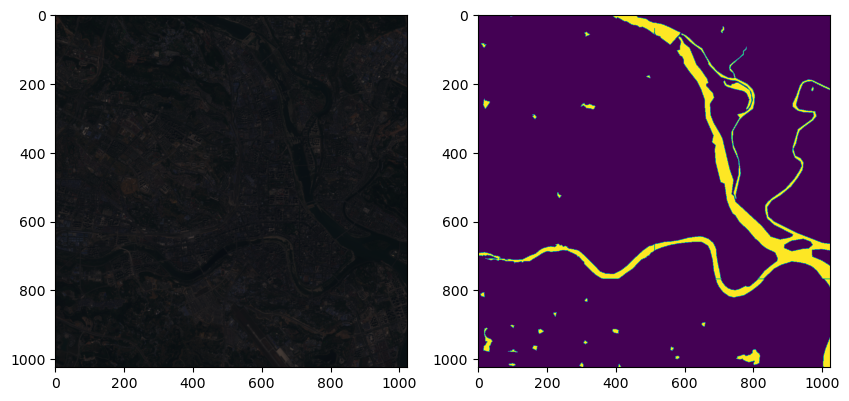

In [22]:
block = tiff.imread(os.path.join(BLOCK_DIR, "456.tif"))
mask_block = tiff.imread(os.path.join(MASK_DIR, "456.tif"))

# normalize the block images
normalized_image = (block - block.min()) / (block.max() - block.min())

# plot block and mask side by side
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(normalized_image[:, :, :3])
ax[1].imshow(mask_block)
plt.show()

In [17]:
block.shape

(1024, 1024, 4)

In [ ]:
IMAGE_DIR = "../.data/2018.04/blocks"

files = os.listdir(IMAGE_DIR)

# add the image files to the hdf5 file
with h5py.File("../.data/2018.04/blocks.h5", "w") as f:
    for file in files:
        img = tiff.imread(os.path.join(IMAGE_DIR, file))
        f.create_dataset(file, data=img)